<a href="https://colab.research.google.com/github/NafisOfficial/student_exam_scores/blob/main/student_exam_scores_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Data

In [5]:
df = pd.read_csv('/content/student_exam_scores.csv')
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [6]:
df = df.drop('student_id',axis=1)

In [7]:
X = df.drop(columns=['exam_score'])
y = df['exam_score']


# Exploratory Data Analysis

In [8]:
# Checking for nan values in the dataset
df.isna().sum()

,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


In [9]:
# The scale of the hours_studied and sleep_hours is very different from the scales of the attendance_percent and previous_scores features.
# I should scale the data before using linear regression
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [10]:
df.dtypes

,0
hours_studied,float64
sleep_hours,float64
attendance_percent,float64
previous_scores,int64
exam_score,float64


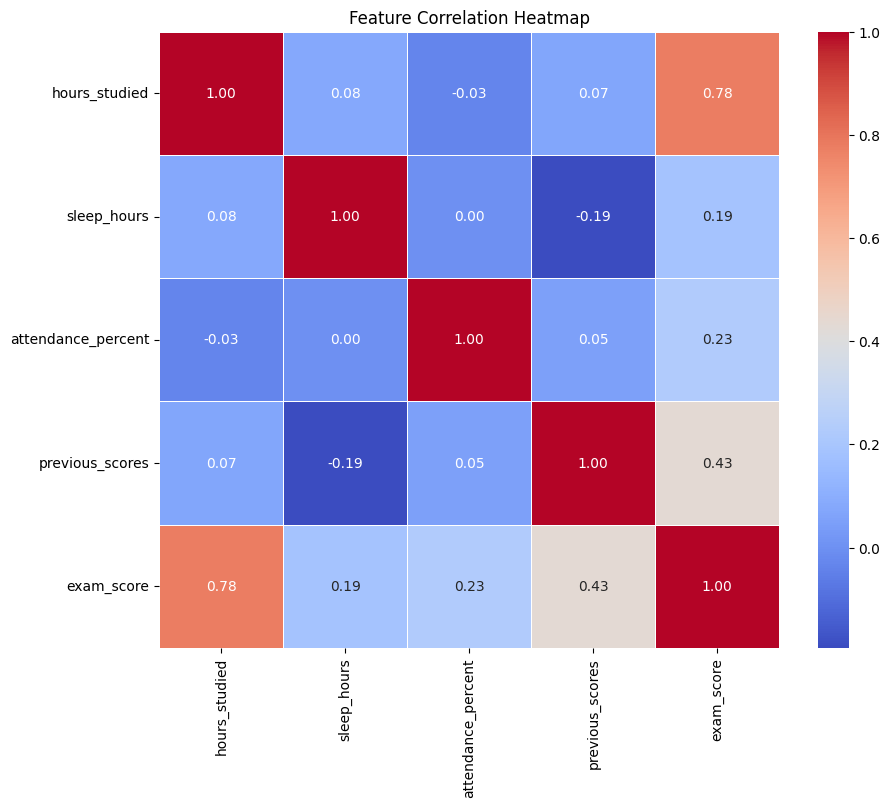

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm',linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)


# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)


LinearRegression()

# Scoring

In [17]:
train_score = lr.score(X_train_scaled,y_train)
test_score = lr.score(X_test_scaled,y_test)

print(f'Training data score: {train_score}.')
print(f'Test data score: {test_score}.')

Training data score: 0.83642950148381.
Test data score: 0.8537447137159517.
